In [141]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Q1. MLR Stepwise Regression – Household Expense
500 household were surveyed on their monthly expenses. The data is in the file MLR_MonthlyExpense.
For this, use the monthly payment as the dependent variable.
1) Begin with family size and iterative add one variable and estimate the resulting regression equation.
2) Does adding any explanatory variable lead to a fall in adjusted R-Squared.
3) Which variables are added in the final model?
4) Interpret the coefficients, R-squared and standard error of estimate for the final model.
5) What result do you get if you use mlxtend stepwise regression

In [142]:
HouseHoldExp_df=pd.read_csv('MLR_MonthlyExpense.csv')
HouseHoldExp_df=HouseHoldExp_df.set_index(['Household'])
HouseHoldExp_df.sample(10)


,Monthly Payment,Family Size,Sector No,Rent,Own,Income,Utilities,Debt
Household,,,,,,,,
467,"$1,222",3,1,0,1,"$48,369",$259,"$5,107"
335,$853,6,1,0,1,"$39,773",$272,"$5,070"
163,$892,5,1,1,0,"$76,802",$213,"$2,551"
46,"$1,458",5,2,0,1,"$1,16,010",$277,"$6,153"
365,"$1,331",6,1,0,1,"$67,154",$271,"$7,349"
116,$670,3,3,0,1,"$1,10,068",$261,"$3,671"
124,"$1,500",3,2,0,1,"$79,808",$261,"$4,963"
363,$603,3,4,1,0,"$45,995",$206,"$3,203"
495,"$1,032",2,1,0,1,"$86,424",$246,"$6,001"


In [143]:
HouseHoldExp_df['MonthlyPay_replace'] =HouseHoldExp_df['Monthly Payment'].str.replace('$', '').str.replace(',','')
HouseHoldExp_df['Income_replace'] =HouseHoldExp_df['Income'].str.replace('$', '').str.replace(',','')
HouseHoldExp_df['Utilities_replace'] =HouseHoldExp_df['Utilities'].str.replace('$', '').str.replace(',','')
HouseHoldExp_df['Debt_replace'] =HouseHoldExp_df['Debt'].str.replace('$', '').str.replace(',','')
HouseHoldExp_df['MonthlyPay_replace'] = pd.to_numeric(HouseHoldExp_df['MonthlyPay_replace'])
HouseHoldExp_df['Income_replace'] = pd.to_numeric(HouseHoldExp_df['Income_replace'])
HouseHoldExp_df['Utilities_replace'] = pd.to_numeric(HouseHoldExp_df['Utilities_replace'])
HouseHoldExp_df['Debt_replace'] = pd.to_numeric(HouseHoldExp_df['Debt_replace'])
HouseHoldExp_df.drop(['Monthly Payment','Income','Utilities','Debt'],inplace=True,axis=1)
HouseHoldExp_df.head()

C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\385151474.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  HouseHoldExp_df['MonthlyPay_replace'] =HouseHoldExp_df['Monthly Payment'].str.replace('$', '').str.replace(',','')
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\385151474.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  HouseHoldExp_df['Income_replace'] =HouseHoldExp_df['Income'].str.replace('$', '').str.replace(',','')
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\385151474.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as li

,Family Size,Sector No,Rent,Own,MonthlyPay_replace,Income_replace,Utilities_replace,Debt_replace
Household,,,,,,,,
1,2,2,0,1,1585,96709,252,5692
2,6,2,1,0,1314,77470,216,4267
3,3,4,1,0,383,65746,207,2903
4,1,1,0,1,1002,56610,249,3896
5,3,3,1,0,743,59185,217,3011


In [144]:
HouseHoldExp_df.drop('Rent',inplace=True,axis=1)
HouseHoldExp_df1=HouseHoldExp_df

In [145]:
HouseHoldExp_df= pd.get_dummies(HouseHoldExp_df,columns=['Sector No','Own'],drop_first=True)
HouseHoldExp_df.head()

,Family Size,MonthlyPay_replace,Income_replace,Utilities_replace,Debt_replace,Sector No_2,Sector No_3,Sector No_4,Own_1
Household,,,,,,,,,
1,2,1585,96709,252,5692,1,0,0,1
2,6,1314,77470,216,4267,1,0,0,0
3,3,383,65746,207,2903,0,0,1,0
4,1,1002,56610,249,3896,0,0,0,1
5,3,743,59185,217,3011,0,1,0,0


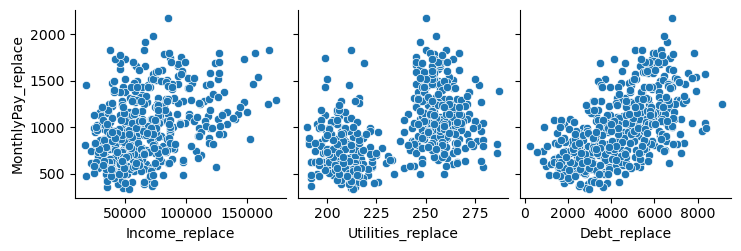

In [146]:
# Lets look at relationship of Profit with the numerical predictors
sns.pairplot(HouseHoldExp_df,     
             x_vars=['Income_replace', 'Utilities_replace', 'Debt_replace'],
             y_vars=['MonthlyPay_replace'])

<AxesSubplot:title={'center':'MonthlyPay_replace'}, xlabel='Sector No'>

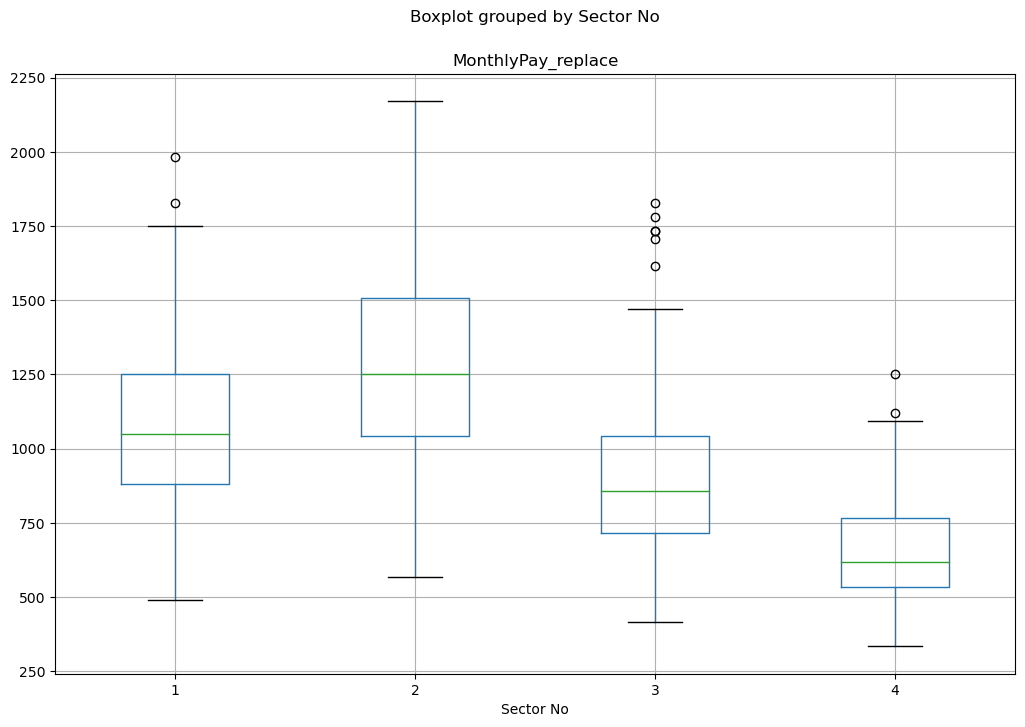

In [147]:
HouseHoldExp_df1.boxplot(column=['MonthlyPay_replace'], by='Sector No', figsize=(12, 8))

<AxesSubplot:title={'center':'MonthlyPay_replace'}, xlabel='Own'>

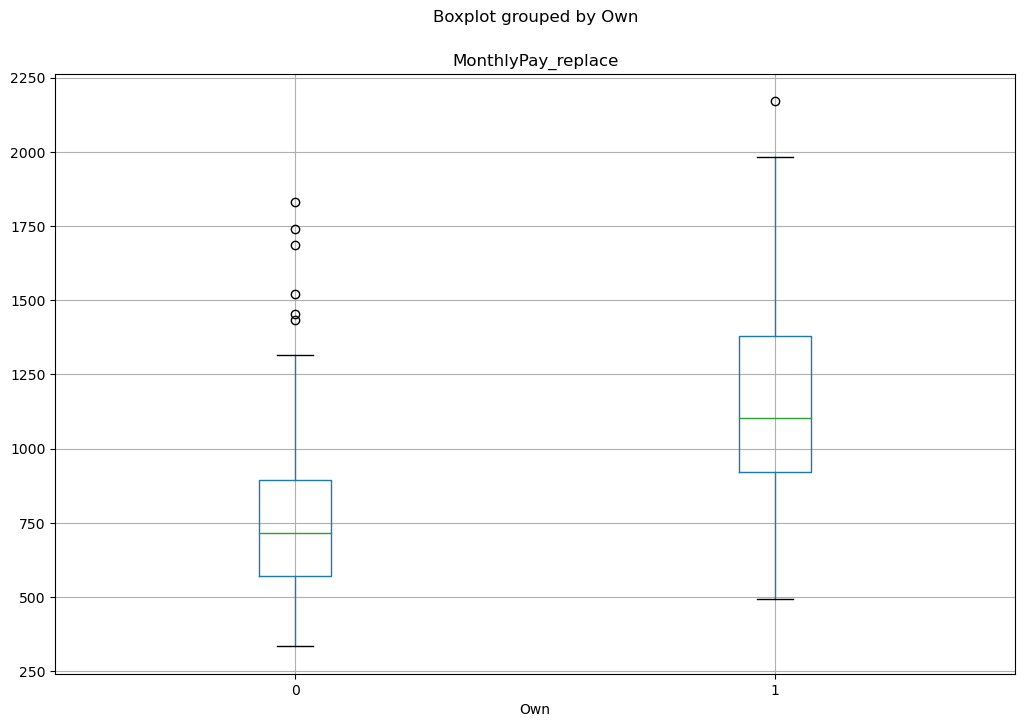

In [148]:
HouseHoldExp_df1.boxplot(column=['MonthlyPay_replace'], by='Own', figsize=(12, 8))

<AxesSubplot:xlabel='MonthlyPay_replace', ylabel='Density'>

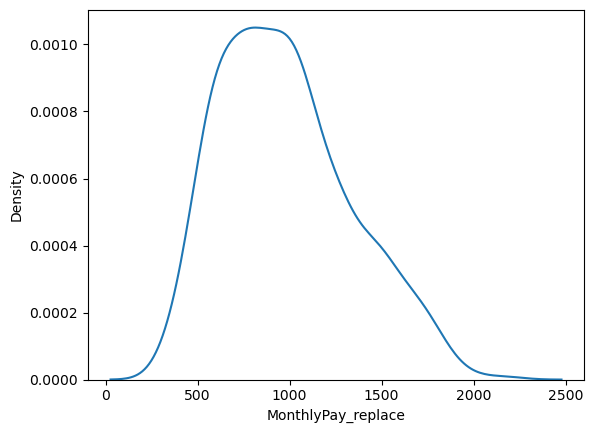

In [149]:
sns.kdeplot(x=HouseHoldExp_df.MonthlyPay_replace)

In [150]:
columns = HouseHoldExp_df.columns

In [151]:
columns

Index(['Family Size', 'MonthlyPay_replace', 'Income_replace',
       'Utilities_replace', 'Debt_replace', 'Sector No_2', 'Sector No_3',
       'Sector No_4', 'Own_1'],
      dtype='object')

In [152]:
y=HouseHoldExp_df['MonthlyPay_replace']
X=HouseHoldExp_df

In [153]:
X.drop('MonthlyPay_replace',inplace=True, axis=1)

In [154]:
X = sm.add_constant(X)

In [155]:
# choose a Significance level of .05 and select the predictor with lowest p value - provided its p value is less than .05

x_opt = X # initializing the dataframe containing optional/trial variable(s)
pvalue_df = pd.DataFrame() # Blank dataframe to store p values
for i in X:
    x_opt=X[i]
    results = sm.OLS(y,x_opt).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues)],[float(results.rsquared_adj)]),columns =['Predictor', 'pvalue', 'R-Sq']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues)))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for const is 1.3238856902081358e-235
adj R Sq. is 0.0
----------------------------------------------
extracted pvalue for Family Size is 6.268927936881773e-124
adj R Sq. is 0.6745147205181972
----------------------------------------------
extracted pvalue for Income_replace is 3.061160307308705e-198
adj R Sq. is 0.8359879543045069
----------------------------------------------
extracted pvalue for Utilities_replace is 2.0078864697812084e-260
adj R Sq. is 0.9075906898770324
----------------------------------------------
extracted pvalue for Debt_replace is 1.605519325013131e-253
adj R Sq. is 0.9015134875764095
----------------------------------------------
extracted pvalue for Sector No_2 is 2.43432807534188e-50
adj R Sq. is 0.3588855954938086
----------------------------------------------
extracted pvalue for Sector No_3 is 1.582959211261215e-24
adj R Sq. is 0.18746421930075818
----------------------------------------------
extracted pvalue for Sector No_4 is 2.5502829

C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3468077514.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues)],[float(results.rsquared_adj)]),columns =['Predictor', 'pvalue', 'R-Sq']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3468077514.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues)],[float(results.rsquared_adj)]),columns =['Predictor', 'pvalue', 'R-Sq']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3468077514.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues)],[float(results.rsquar

In [156]:
pvalue_df = pvalue_df[pvalue_df["Predictor"].str.contains("const") == False]
pvalue_df.sort_values('pvalue',inplace=True)
pvalue_df

,Predictor,pvalue,R-Sq
0,Utilities_replace,2.007886e-260,0.907591
0,Debt_replace,1.605519e-253,0.901513
0,Income_replace,3.061160e-198,0.835988
0,Own_1,1.088993e-128,0.688491
0,Family Size,6.268928e-124,0.674515
0,Sector No_2,2.434328e-50,0.358886
0,Sector No_3,1.582959e-24,0.187464
0,Sector No_4,2.550283e-13,0.100012


In [157]:
# from P value stand point all all dependent variables are significant


In [158]:
# Extract the name of the variable having lowest pvalue and push it into a list 
a = list(pvalue_df["Predictor"])
b = [a.pop(0)]

In [159]:
b # list containing name of the selected variable in first iteration

['Utilities_replace']

In [160]:
a # list containing names of the trial variables

['Debt_replace',
 'Income_replace',
 'Own_1',
 'Family Size',
 'Sector No_2',
 'Sector No_3',
 'Sector No_4']

In [161]:
# Now we select the variable containing lowest p value and add variavles one at a time iterativelty to check in which
# combination we get the new variable with lowest p value.

x_sel=X[b] #dataframe containing selected variable(s)
x_opt=X[a] #dataframe containing optional/trial variable(s)
pvalue_df = pd.DataFrame() # Blank dataframe to store p values
for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[2])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[2])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Debt_replace is 1.1987150119645965e-21
extracted pvalue for Utilities_replace is 0.41511039957850737
adj R Sq. is 0.3641195912172418
----------------------------------------------
extracted pvalue for Income_replace is 2.697251016098821e-13
extracted pvalue for Utilities_replace is 1.506333605460051e-23
adj R Sq. is 0.31362379502032933
----------------------------------------------
extracted pvalue for Own_1 is 2.943420880432558e-12
extracted pvalue for Utilities_replace is 0.04343300833911773
adj R Sq. is 0.3071078915832218
----------------------------------------------
extracted pvalue for Family Size is 6.429118609971349e-08
extracted pvalue for Utilities_replace is 4.697755033465727e-37
adj R Sq. is 0.2793587165280217
----------------------------------------------
extracted pvalue for Sector No_2 is 1.8259565591539036e-17
extracted pvalue for Utilities_replace is 3.1551463583204907e-22
adj R Sq. is 0.3392694155135322
--------------------------------------------

C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3688802780.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[2])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3688802780.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[2])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3688802780.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[2])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_264

In [162]:
pvalue_df.sort_values('pvalue',inplace=True)

In [163]:
pvalue_df


,Predictor,pvalue
0,Sector No_4,2.717668e-26
0,Debt_replace,1.198715e-21
0,Sector No_2,1.825957e-17
0,Income_replace,2.697251e-13
0,Own_1,2.943421e-12
0,Family Size,6.429119e-08
0,Sector No_3,3.153724e-01


In [164]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]

In [165]:
b

['Utilities_replace', 'Sector No_4']

In [166]:
a

['Debt_replace',
 'Sector No_2',
 'Income_replace',
 'Own_1',
 'Family Size',
 'Sector No_3']

In [167]:
x_sel=X[b]
x_opt=X[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[3])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[3])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Debt_replace is 7.363395436574772e-13
extracted pvalue for Utilities_replace is 0.25981256160236754
extracted pvalue for Sector No_4 is 1.5989565685133388e-17
adj R Sq. is 0.44966029663790197
----------------------------------------------
extracted pvalue for Sector No_2 is 3.876976594358872e-11
extracted pvalue for Utilities_replace is 1.9786689683277293e-15
extracted pvalue for Sector No_4 is 5.441435816938051e-20
adj R Sq. is 0.44096252824813276
----------------------------------------------
extracted pvalue for Income_replace is 3.842631198005888e-05
extracted pvalue for Utilities_replace is 2.468404629124231e-17
extracted pvalue for Sector No_4 is 2.9047667344207557e-18
adj R Sq. is 0.40998015070876825
----------------------------------------------
extracted pvalue for Own_1 is 1.0123876874589377e-09
extracted pvalue for Utilities_replace is 0.03861937714183851
extracted pvalue for Sector No_4 is 9.250954545587683e-24
adj R Sq. is 0.4337247416662001
----------

C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3576440984.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[3])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3576440984.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[3])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3576440984.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[3])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\

In [168]:
pvalue_df.sort_values('pvalue',inplace=True)

In [169]:
pvalue_df

,Predictor,pvalue
0,Debt_replace,7.363395e-13
0,Sector No_2,3.876977e-11
0,Own_1,1.012388e-09
0,Sector No_3,1.704609e-09
0,Family Size,1.631576e-06
0,Income_replace,3.842631e-05


In [170]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]

In [171]:
b

['Utilities_replace', 'Sector No_4', 'Debt_replace']

In [172]:
a

['Sector No_2', 'Own_1', 'Sector No_3', 'Family Size', 'Income_replace']

In [173]:
x_sel=X[b]
x_opt=X[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[4])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[4])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print("extracted pvalue for",b[2],"is",float(results.pvalues[3]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Sector No_2 is 2.2741147025357843e-08
extracted pvalue for Utilities_replace is 0.248903877740423
extracted pvalue for Sector No_4 is 2.925773054524807e-14
extracted pvalue for Debt_replace is 4.2393164536796317e-10
adj R Sq. is 0.48231400845751093
----------------------------------------------
extracted pvalue for Own_1 is 5.058327978082786e-10
extracted pvalue for Utilities_replace is 2.3470348840409706e-06
extracted pvalue for Sector No_4 is 1.40997217082342e-15
extracted pvalue for Debt_replace is 3.749601515921291e-13
adj R Sq. is 0.49001294619349445
----------------------------------------------
extracted pvalue for Sector No_3 is 1.5669753494049934e-06
extracted pvalue for Utilities_replace is 0.2468361864799438
extracted pvalue for Sector No_4 is 1.633931888815006e-22
extracted pvalue for Debt_replace is 6.407697723771292e-10
adj R Sq. is 0.47367807255919214
----------------------------------------------
extracted pvalue for Family Size is 1.240644804302044

C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3692040554.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[4])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3692040554.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[4])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\3692040554.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[4])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\

In [174]:
pvalue_df.sort_values('pvalue',inplace=True)

In [175]:
pvalue_df

,Predictor,pvalue
0,Family Size,1.240645e-11
0,Own_1,5.058328e-10
0,Sector No_2,2.274115e-08
0,Sector No_3,1.566975e-06
0,Income_replace,2.672890e-01


In [176]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]

In [177]:
b

['Utilities_replace', 'Sector No_4', 'Debt_replace', 'Family Size']

In [178]:
a

['Own_1', 'Sector No_2', 'Sector No_3', 'Income_replace']

In [179]:
x_sel=X[b]
x_opt=X[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[5])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[5])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print("extracted pvalue for",b[2],"is",float(results.pvalues[3]))
    print("extracted pvalue for",b[3],"is",float(results.pvalues[4]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Own_1 is 0.13784235926007887
extracted pvalue for Utilities_replace is 0.37978316445901517
extracted pvalue for Sector No_4 is 1.3997280658872996e-14
extracted pvalue for Debt_replace is 3.348812108045216e-15
extracted pvalue for Family Size is 0.0021247507835733905
adj R Sq. is 0.49866128205695326
----------------------------------------------
extracted pvalue for Sector No_2 is 6.669747001301282e-07
extracted pvalue for Utilities_replace is 0.14208798262208436
extracted pvalue for Sector No_4 is 3.8404584414812904e-12
extracted pvalue for Debt_replace is 1.9103203723906934e-14
extracted pvalue for Family Size is 3.561771789472034e-10
adj R Sq. is 0.5210115202710108
----------------------------------------------
extracted pvalue for Sector No_3 is 1.216267377507737e-05
extracted pvalue for Utilities_replace is 0.1382088454971828
extracted pvalue for Sector No_4 is 1.096305350390276e-18
extracted pvalue for Debt_replace is 2.4182327892366952e-14
extracted pvalue fo

C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\2352267937.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[5])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\2352267937.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[5])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\2352267937.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[5])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\

In [180]:
pvalue_df.sort_values('pvalue',inplace=True)

In [181]:
pvalue_df

,Predictor,pvalue
0,Sector No_2,6.669747e-07
0,Sector No_3,1.216267e-05
0,Income_replace,4.597111e-02
0,Own_1,1.378424e-01


In [182]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]

In [183]:
b

['Utilities_replace',
 'Sector No_4',
 'Debt_replace',
 'Family Size',
 'Sector No_2']

In [184]:
a

['Sector No_3', 'Income_replace', 'Own_1']

In [185]:
x_sel=X[b]
x_opt=X[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[6])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[6])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print("extracted pvalue for",b[2],"is",float(results.pvalues[3]))
    print("extracted pvalue for",b[3],"is",float(results.pvalues[4]))
    print("extracted pvalue for",b[4],"is",float(results.pvalues[5]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Sector No_3 is 0.011278236633759159
extracted pvalue for Utilities_replace is 0.13973133680461106
extracted pvalue for Sector No_4 is 4.790378919037337e-13
extracted pvalue for Debt_replace is 4.1154043165599495e-13
extracted pvalue for Family Size is 5.78775360184669e-10
extracted pvalue for Sector No_2 is 0.0005376529539942015
adj R Sq. is 0.5262567698145891
----------------------------------------------
extracted pvalue for Income_replace is 0.6798161821404083
extracted pvalue for Utilities_replace is 0.12762765517557745
extracted pvalue for Sector No_4 is 2.4560229513712516e-11
extracted pvalue for Debt_replace is 3.6039856704358486e-12
extracted pvalue for Family Size is 4.180073562761979e-10
extracted pvalue for Sector No_2 is 4.95675991618056e-06
adj R Sq. is 0.5202059082584598
----------------------------------------------
extracted pvalue for Own_1 is 0.27345859695729274
extracted pvalue for Utilities_replace is 0.6061185517738622
extracted pvalue for Sect

C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\193970350.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[6])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\193970350.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[6])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\193970350.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[6])]),columns =['Predictor', 'pvalue']))


In [186]:
pvalue_df.sort_values('pvalue',inplace=True)

In [187]:
pvalue_df

,Predictor,pvalue
0,Sector No_3,0.011278
0,Own_1,0.273459
0,Income_replace,0.679816


In [188]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]

In [189]:
b

['Utilities_replace',
 'Sector No_4',
 'Debt_replace',
 'Family Size',
 'Sector No_2',
 'Sector No_3']

In [190]:
a

['Own_1', 'Income_replace']

In [191]:
x_sel=X[b]
x_opt=X[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[7])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[7])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print("extracted pvalue for",b[2],"is",float(results.pvalues[3]))
    print("extracted pvalue for",b[3],"is",float(results.pvalues[4]))
    print("extracted pvalue for",b[4],"is",float(results.pvalues[5]))
    print("extracted pvalue for",b[5],"is",float(results.pvalues[6]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Own_1 is 0.46702332799418866
extracted pvalue for Utilities_replace is 0.8620033712409849
extracted pvalue for Sector No_4 is 7.425842549746153e-13
extracted pvalue for Debt_replace is 7.101434084660884e-12
extracted pvalue for Family Size is 0.0009582917923867338
extracted pvalue for Sector No_2 is 0.0005603216103684447
extracted pvalue for Sector No_3 is 0.016582483146178183
adj R Sq. is 0.5258045364569686
----------------------------------------------
extracted pvalue for Income_replace is 0.9554902253524087
extracted pvalue for Utilities_replace is 0.15996935741582954
extracted pvalue for Sector No_4 is 3.731263618181944e-12
extracted pvalue for Debt_replace is 1.067726035614108e-11
extracted pvalue for Family Size is 1.1584364060962773e-09
extracted pvalue for Sector No_2 is 0.000732472191608621
extracted pvalue for Sector No_3 is 0.012482374037890214
adj R Sq. is 0.5252968857866961
----------------------------------------------


C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\1668511632.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[7])]),columns =['Predictor', 'pvalue']))
C:\Users\sbiswal\AppData\Local\Temp\ipykernel_26436\1668511632.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[7])]),columns =['Predictor', 'pvalue']))


In [192]:
pvalue_df.sort_values('pvalue',inplace=True)

In [193]:
pvalue_df

,Predictor,pvalue
0,Own_1,0.467023
0,Income_replace,0.955490


In [194]:
# we have to drop Own_1 and Income_replace as they have insignificant p-value

In [195]:
X.drop(['Income_replace','Own_1'],inplace=True,axis=1)

In [196]:
# final model

final_model= sm.OLS(y, X).fit()

In [197]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:     MonthlyPay_replace   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     93.39
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           4.67e-78
Time:                        18:19:41   Log-Likelihood:                -3454.8
No. Observations:                 500   AIC:                             6924.
Df Residuals:                     493   BIC:                             6953.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               581.1166    130.98

In [198]:
# we may have to drop Utilities_replace , as the p value seems to be insignificant.

# ML XTEND

In [217]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [200]:
y1=HouseHoldExp_df1['MonthlyPay_replace']

In [201]:
X1=HouseHoldExp_df1
X1.drop(['MonthlyPay_replace'],inplace=True,axis=1)


In [202]:
y1

Household
1      1585
2      1314
3       383
4      1002
5       743
       ... 
496    1184
497     990
498    1603
499     831
500     948
Name: MonthlyPay_replace, Length: 500, dtype: int64

In [203]:
X1

,Family Size,Sector No,Own,Income_replace,Utilities_replace,Debt_replace
Household,,,,,,
1,2,2,1,96709,252,5692
2,6,2,0,77470,216,4267
3,3,4,0,65746,207,2903
4,1,1,1,56610,249,3896
5,3,3,0,59185,217,3011
...,...,...,...,...,...,...
496,3,1,0,76825,197,3194
497,5,2,1,121113,274,8400
498,2,2,1,76963,253,5675


In [210]:
# Define which columns should be encoded vs scaled
columns_to_encode = ['Sector No','Own','Family Size']
columns_to_scale  = ['Income_replace', 'Utilities_replace','Debt_replace']

# Instantiate encoder/scaler
scaler = StandardScaler()
le  = LabelEncoder()

X1[columns_to_encode] = X1[columns_to_encode].apply(le.fit_transform)

X1[columns_to_scale] = scaler.fit_transform(X1[columns_to_scale])

print("Scaled X with  StandardScaler")
X1.head()

Scaled X with  StandardScaler


,Family Size,Sector No,Own,Income_replace,Utilities_replace,Debt_replace
Household,,,,,,
1,1,1,1,1.029164,0.632283,0.796121
2,5,1,0,0.379936,-0.760070,-0.030290
3,2,3,0,-0.015695,-1.108159,-0.821325
4,0,0,1,-0.323994,0.516254,-0.245447
5,2,2,0,-0.237099,-0.721394,-0.758692


In [211]:
lr = LinearRegression()

In [218]:
sfs_forward = sfs(lr,
            k_features=(1,4),
            forward=True,
            floating=False,
            scoring='neg_mean_squared_error',
            cv=10)
sfs = sfs_forward.fit(X1, y1)

In [215]:
print('Best subset:', sfs.k_feature_names_)

Best subset: ('Family Size', 'Sector No', 'Income_replace', 'Debt_replace')


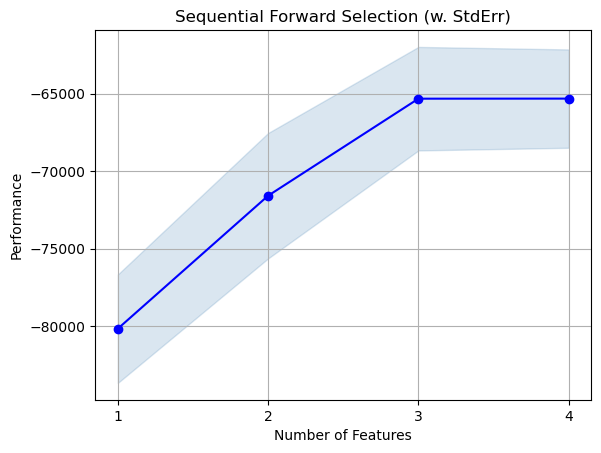

In [219]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [220]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs_back = sfs(lr,
            k_features=5,
            forward=False,
            floating=False,
            scoring='r2',
            cv=10)

sfs = sfs_back.fit(X_s, y1)
print('Best subset:', sfs.k_feature_names_)

Best subset: ('Family Size', 'Sector No', 'Income_replace', 'Utilities_replace', 'Debt_replace')


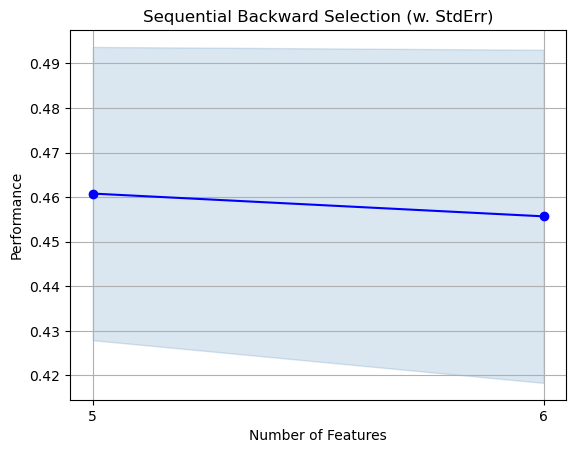

In [221]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

### Q2. MLR Feature Selection – Box Office Revenue Prediction
An industry analyst is interested in building a predictive model to understand the impact of various factors and opening week revenue numbers in the overall collections of a movie (Total revenue).
Box Office collection of Bollywood movies were recorded. The data is provided in file: MLR_MovieBoxOffice_data.csv.
1) Identify the variables that can be used to fit a linear regression model.
2) How is the revenue impacted by genre of the movie?
3) Does the month have any role to play in movie opening?
4) Use any variable reduction technique to fit a model using all relevant variables.
5) Do you find any outliers in the dataset? What could be the possible reason for those being outliers?

In [222]:
MovieBoxOff_df=pd.read_csv('MLR_MovieBoxOffice_data.csv')
MovieBoxOff_plot_df=pd.read_csv('MLR_MovieBoxOffice_data.csv')
MovieBoxOff_df=MovieBoxOff_df.set_index(['movie_name'])
MovieBoxOff_df.sample(10)


,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,movie_director,release_month,release_year
movie_name,,,,,,,,,
De De Pyaar De,95.86,10.41,38.54,61.05,Comedy,135,Akiv Ali,May,2019
Judwaa 2,138.47,16.10,59.25,98.08,Comedy,150,David Dhawan,Sep,2017
Game Over,11.06,0.97,4.95,9.02,Thriller,103,Ashwin Saravanan,Jun,2019
Soorma,30.11,3.20,13.85,21.21,Biographical,131,Shaad Ali,Jul,2018
October,45.36,5.04,20.25,30.24,Drama,116,Shoojit Sircar,Apr,2018
Jawaani Jaaneman,27.91,3.24,12.83,20.21,Comedy,119,Nitin Kakkar,Jan,2020
Satyameva Jayate,75.09,20.52,56.91,75.09,Action,141,Milap Zaveri,Aug,2018
Panipat,34.28,4.12,17.68,25.68,Historical,162,Ashutosh Gowariker,Dec,2019
Pari,22.75,4.36,15.34,22.75,Horror,137,Prosit Roy,Mar,2018


In [223]:
# Length of movie (run tim) a categorical variable  can not  influence  revenue- we should drop it
len(MovieBoxOff_df['runtime'].unique())

59

In [224]:
# 116 Directors - no relationship drop
len(MovieBoxOff_df['movie_director'].unique())

116

In [225]:
# we should consider this 
len(MovieBoxOff_df['release_month'].unique())

12

In [226]:
# since we are trying to predict future Total revenue - release year  can be dropped


In [227]:
y=MovieBoxOff_df['revenue_total']
X=MovieBoxOff_df
X.drop(['revenue_total','runtime','movie_director','release_year'],inplace=True , axis=1)

In [228]:
X


,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,release_month
movie_name,,,,,
Angrezi Medium,4.03,9.03,9.36,Drama,Mar
Baaghi 3,17.50,53.83,90.67,Action,Mar
Thappad,3.07,14.66,22.79,Drama,Feb
Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,Comedy,Feb
Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,Horror,Feb
...,...,...,...,...,...
Bhoomi,2.25,7.48,10.28,Drama,Sep
Haseena Parkar,1.87,6.10,8.00,Biographical,Sep
Lucknow Central,2.04,8.42,10.42,Thriller,Sep


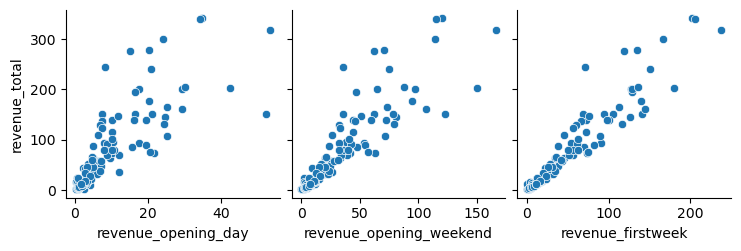

In [229]:
sns.pairplot(MovieBoxOff_plot_df,x_vars=['revenue_opening_day','revenue_opening_weekend','revenue_firstweek'],y_vars=['revenue_total'])

<AxesSubplot:xlabel='revenue_total', ylabel='movie_genre'>

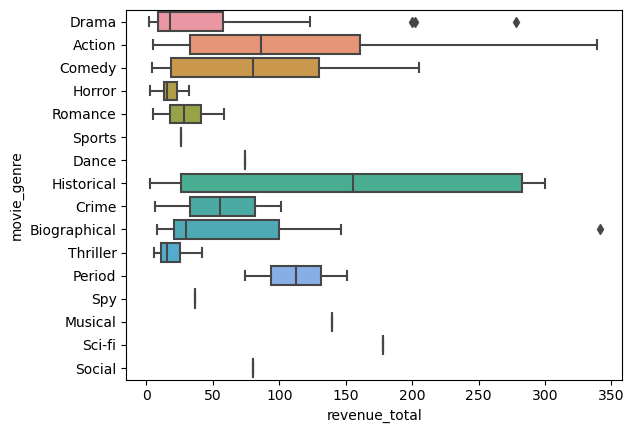

In [230]:
sns.boxplot(data=MovieBoxOff_plot_df, y="movie_genre", x="revenue_total")

<AxesSubplot:xlabel='revenue_total', ylabel='release_month'>

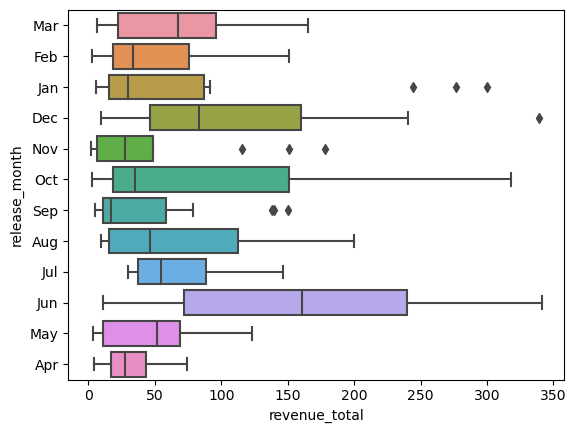

In [231]:
sns.boxplot(data=MovieBoxOff_plot_df, y="release_month", x="revenue_total")

In [232]:
X

,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,release_month
movie_name,,,,,
Angrezi Medium,4.03,9.03,9.36,Drama,Mar
Baaghi 3,17.50,53.83,90.67,Action,Mar
Thappad,3.07,14.66,22.79,Drama,Feb
Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,Comedy,Feb
Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,Horror,Feb
...,...,...,...,...,...
Bhoomi,2.25,7.48,10.28,Drama,Sep
Haseena Parkar,1.87,6.10,8.00,Biographical,Sep
Lucknow Central,2.04,8.42,10.42,Thriller,Sep


In [233]:
# Define which columns should be encoded vs scaled
columns_to_encode = ['movie_genre','release_month']
columns_to_scale  = ['revenue_opening_day', 'revenue_opening_weekend','revenue_firstweek']

# Instantiate encoder/scaler
scaler = StandardScaler()
le  = LabelEncoder()

X[columns_to_encode] = X[columns_to_encode].apply(le.fit_transform)

X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])



In [234]:
lr = LinearRegression()

In [235]:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs_forward = sfs(lr,
            k_features=4,
            forward=True,
            floating=False,
            scoring='neg_mean_squared_error',
            cv=10)

sfs = sfs_forward.fit(X, y)
print('Best subset:', sfs.k_feature_names_)

Best subset: ('revenue_opening_day', 'revenue_firstweek', 'movie_genre', 'release_month')


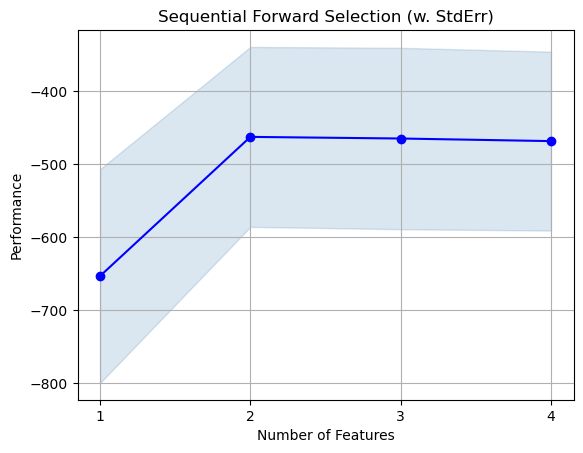

In [236]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
#q2_1 : The variables to be used {'revenue_opening_day', 'revenue_firstweek', 'movie_genre', 'release_month'}
#q2_2: The genre has minimal impact on he revenue
#q2_3: The release month has no effect on the revenue
#q2_4: There are outliers in the data.